# Automatizovaná detekce rotace DH PSF

In [29]:
from PSFrot import PSFrot
import proplot as pplt
import numpy as np 
from skimage.draw import circle_perimeter
from skimage.color import rgb2gray, gray2rgb
# from scipy.ndimage.measurements import center_of_mass
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

-79.99202019855866
-90.0
0.0
113.96248897457819
116.56505117707799
-66.03751102542182
90.0
82.8749836510982
-81.86989764584403
53.13010235415598


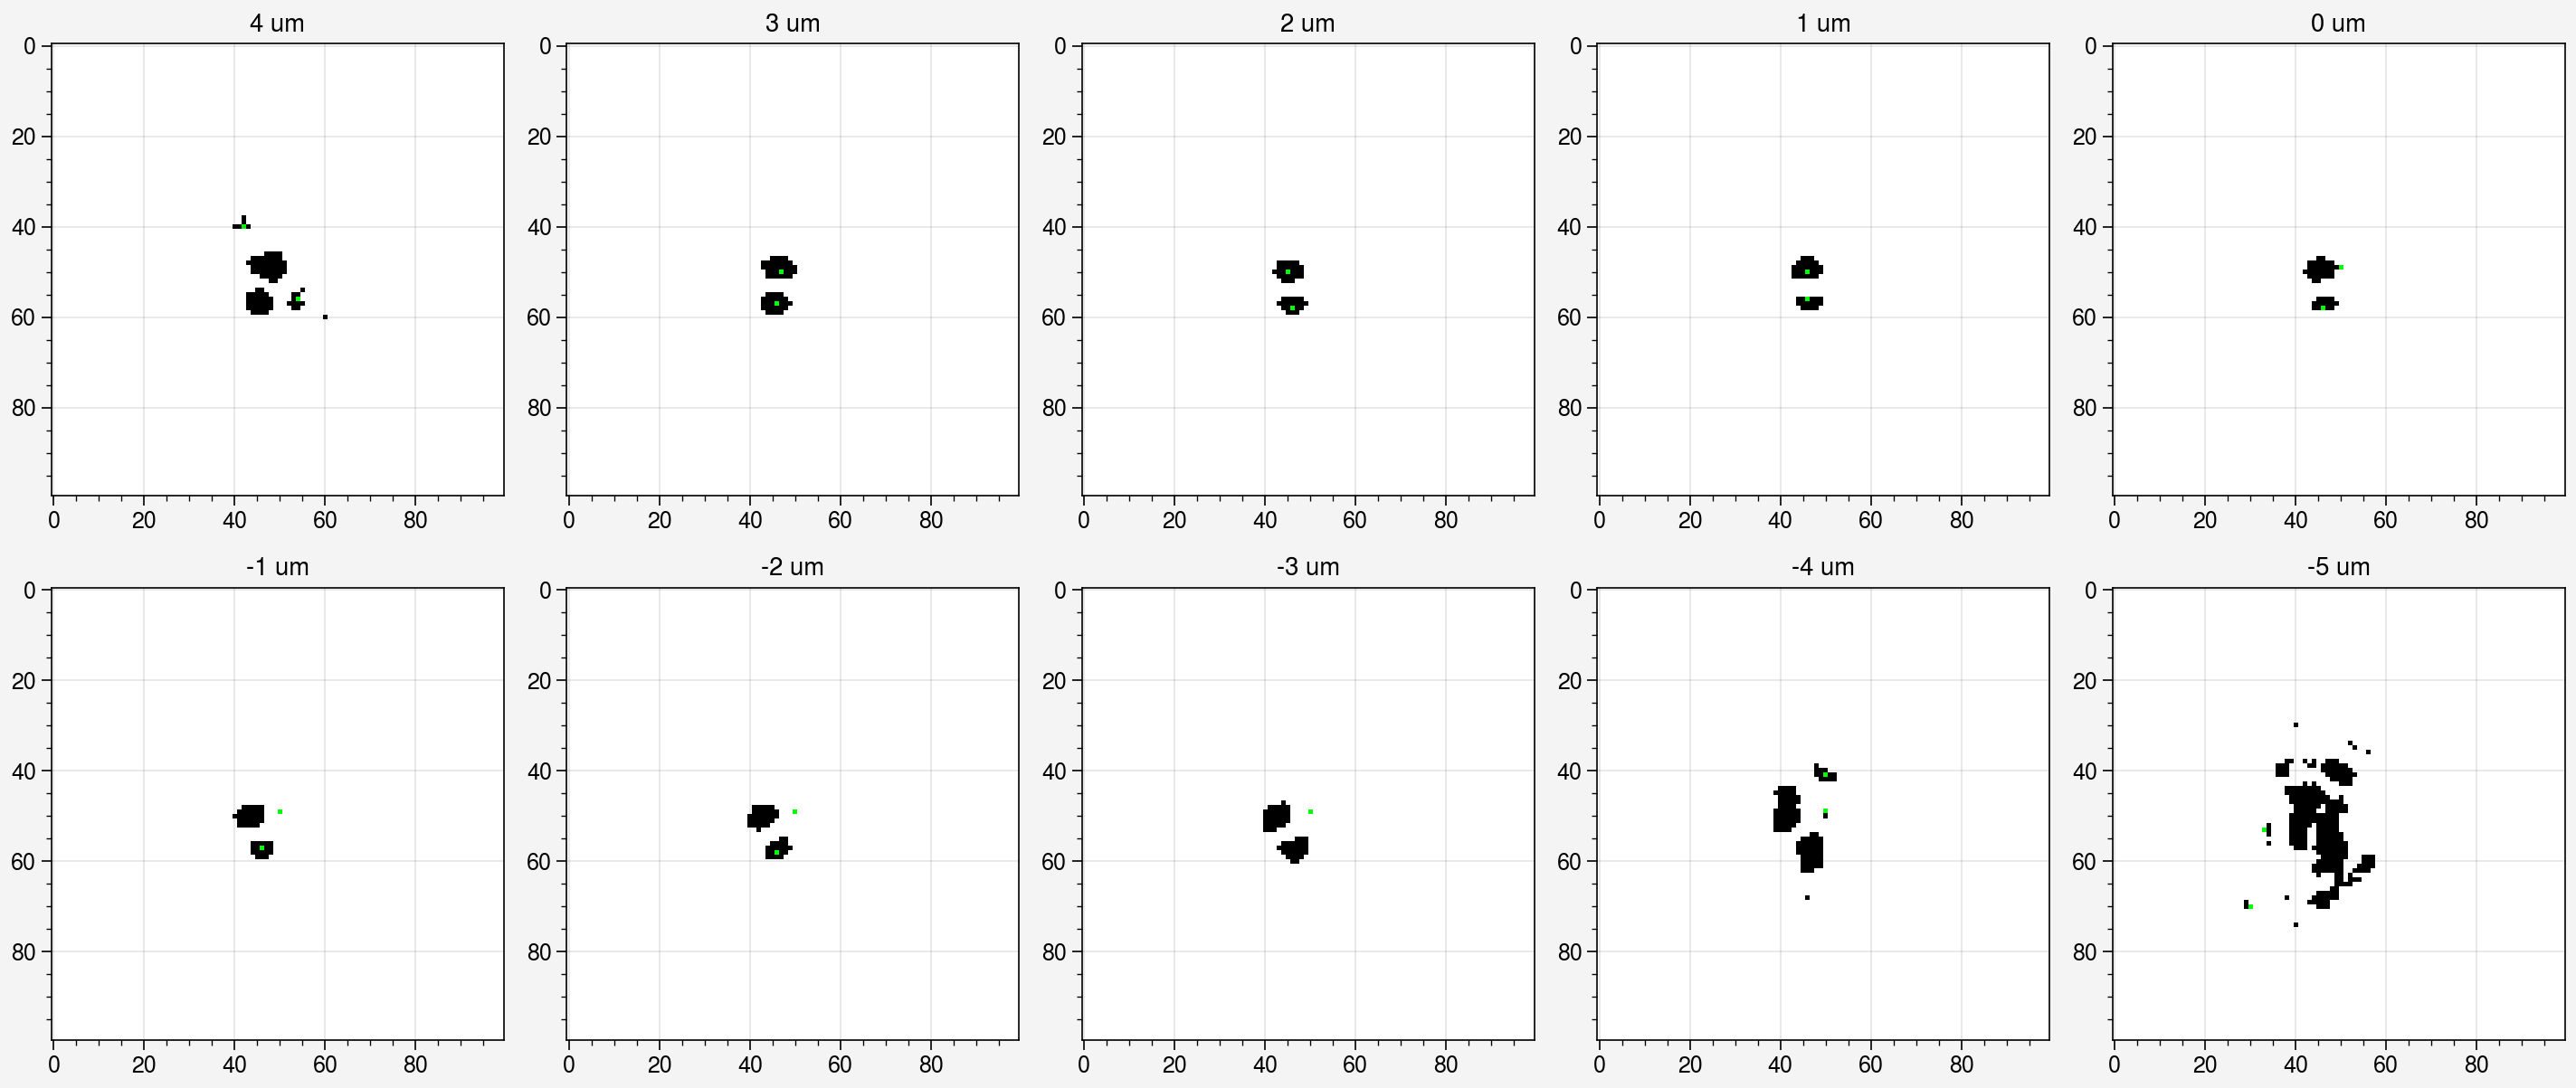

In [30]:
fig, axs = pplt.subplots(nrows = 2, ncols = 5, share=False)

angles = np.zeros(10)

for i in range(-5, 5):
    filename = "test_imgs/" + str(i) + ".tiff"
    image = PSFrot.readImage(path = filename)
    image = PSFrot.threshold(image, intensity=0.4)
    cx, cy, rad = PSFrot.findCircles(image)
    imC = gray2rgb(image)
    print(np.rad2deg(np.arctan2(cy[1] - cy[0], cx[1] - cx[0])))
    for cx, cy in zip(cx, cy):
        imC[cy, cx] = (0, 1., 0)
    axs[i//5, 4-i%5].imshow(imC)
    axs[i//5, 4-i%5].format(title = str(i) + " um")
    
fig.save("vysl.png", dpi=333)


(50.1, 42.8) 
 (57.23809523809524, 46.285714285714285)


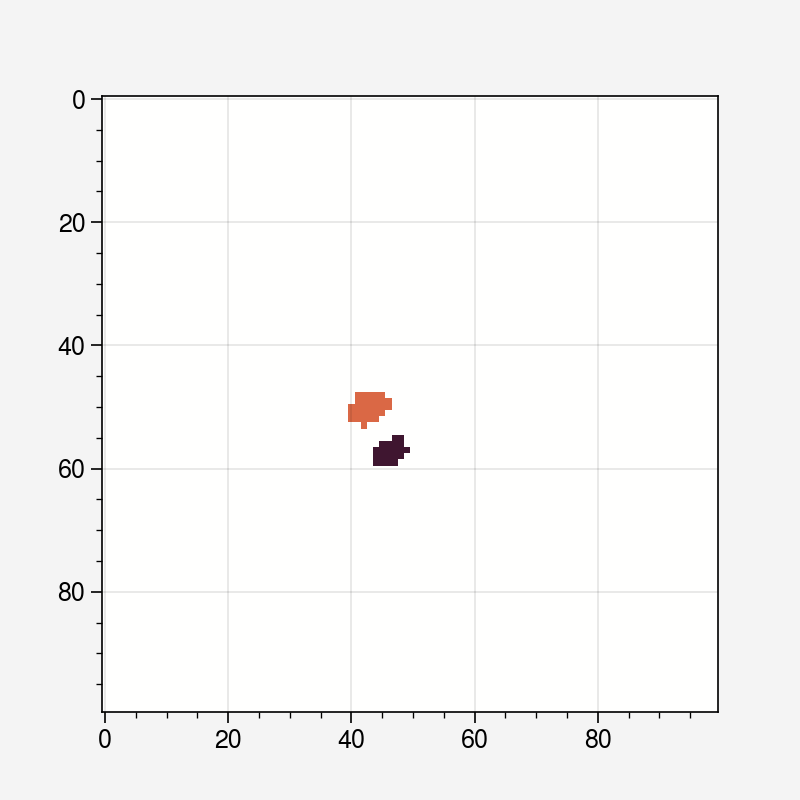

In [31]:
i = -2
filename = "test_imgs/" + str(i) + ".tiff"
image = PSFrot.readImage(path = filename)
image = PSFrot.threshold(image, intensity=0.4)
# cx, cy, rad = PSFrot.findCircles(image)
# imC = gray2rgb(image)
# print(np.rad2deg(np.arctan2(cy[1] - cy[0], cx[1] - cx[0])))
# for cx, cy in zip(cx, cy):
#     imC[cy, cx] = (0, 1., 0)
# axs[i//5, 4-i%5].imshow(imC)
# axs[i//5, 4-i%5].format(title = str(i) + " um")


fill_psf = np.abs(1-image)
plt.imshow(fill_psf)
# fill_psf = ndi.binary_fill_holes(image)
label_objects, nb_labels = ndi.label(fill_psf)
plt.imshow(label_objects)
c1 = ndi.center_of_mass(label_objects*(label_objects==1))
c2 = ndi.center_of_mass(label_objects*(label_objects==2))

print(c1, '\n', c2)

In [32]:
label_objects, nb_labels = ndi.label(fill_coins)
# fill_psf = ndi.binary_fill_holes(image)
label_objects, nb_labels = ndi.label(fill_psf)
plt.imshow(label_objects*(label_objects == 1))
fill_psf = np.abs(1-image)
plt.imshow(fill_psf)
# fill_psf = ndi.binary_fill_holes(image)
# label_objects, nb_labels = ndi.label(fill_psf)
# plt.imshow(label_objects*(label_objects == 1))

NameError: name 'fill_coins' is not defined

(30.0, 40.0)
(34.0, 52.0)
-161.565051177078
(40.92307692307692, 49.76923076923077)
(48.6, 41.42)
-42.597812881362515
(50.1875, 42.40625)
(57.285714285714285, 46.535714285714285)
-120.18917546930967
(50.1, 42.8)
(57.23809523809524, 46.285714285714285)
-116.02743899733018
(50.0, 43.37931034482759)
(57.333333333333336, 46.0)
-109.66520129767999
(49.5, 45.43333333333333)
(57.06666666666667, 46.333333333333336)
-96.78304885520119
(49.285714285714285, 45.892857142857146)
(56.875, 46.5)
-94.57392125990084
(49.851851851851855, 45.22222222222222)
(57.3, 46.0)
-95.96154253558295
(49.125, 46.5)
(57.0, 45.629629629629626)
-83.69308320780006
(39.5, 41.666666666666664)
(48.74418604651163, 47.51162790697674)
-122.30455830093297


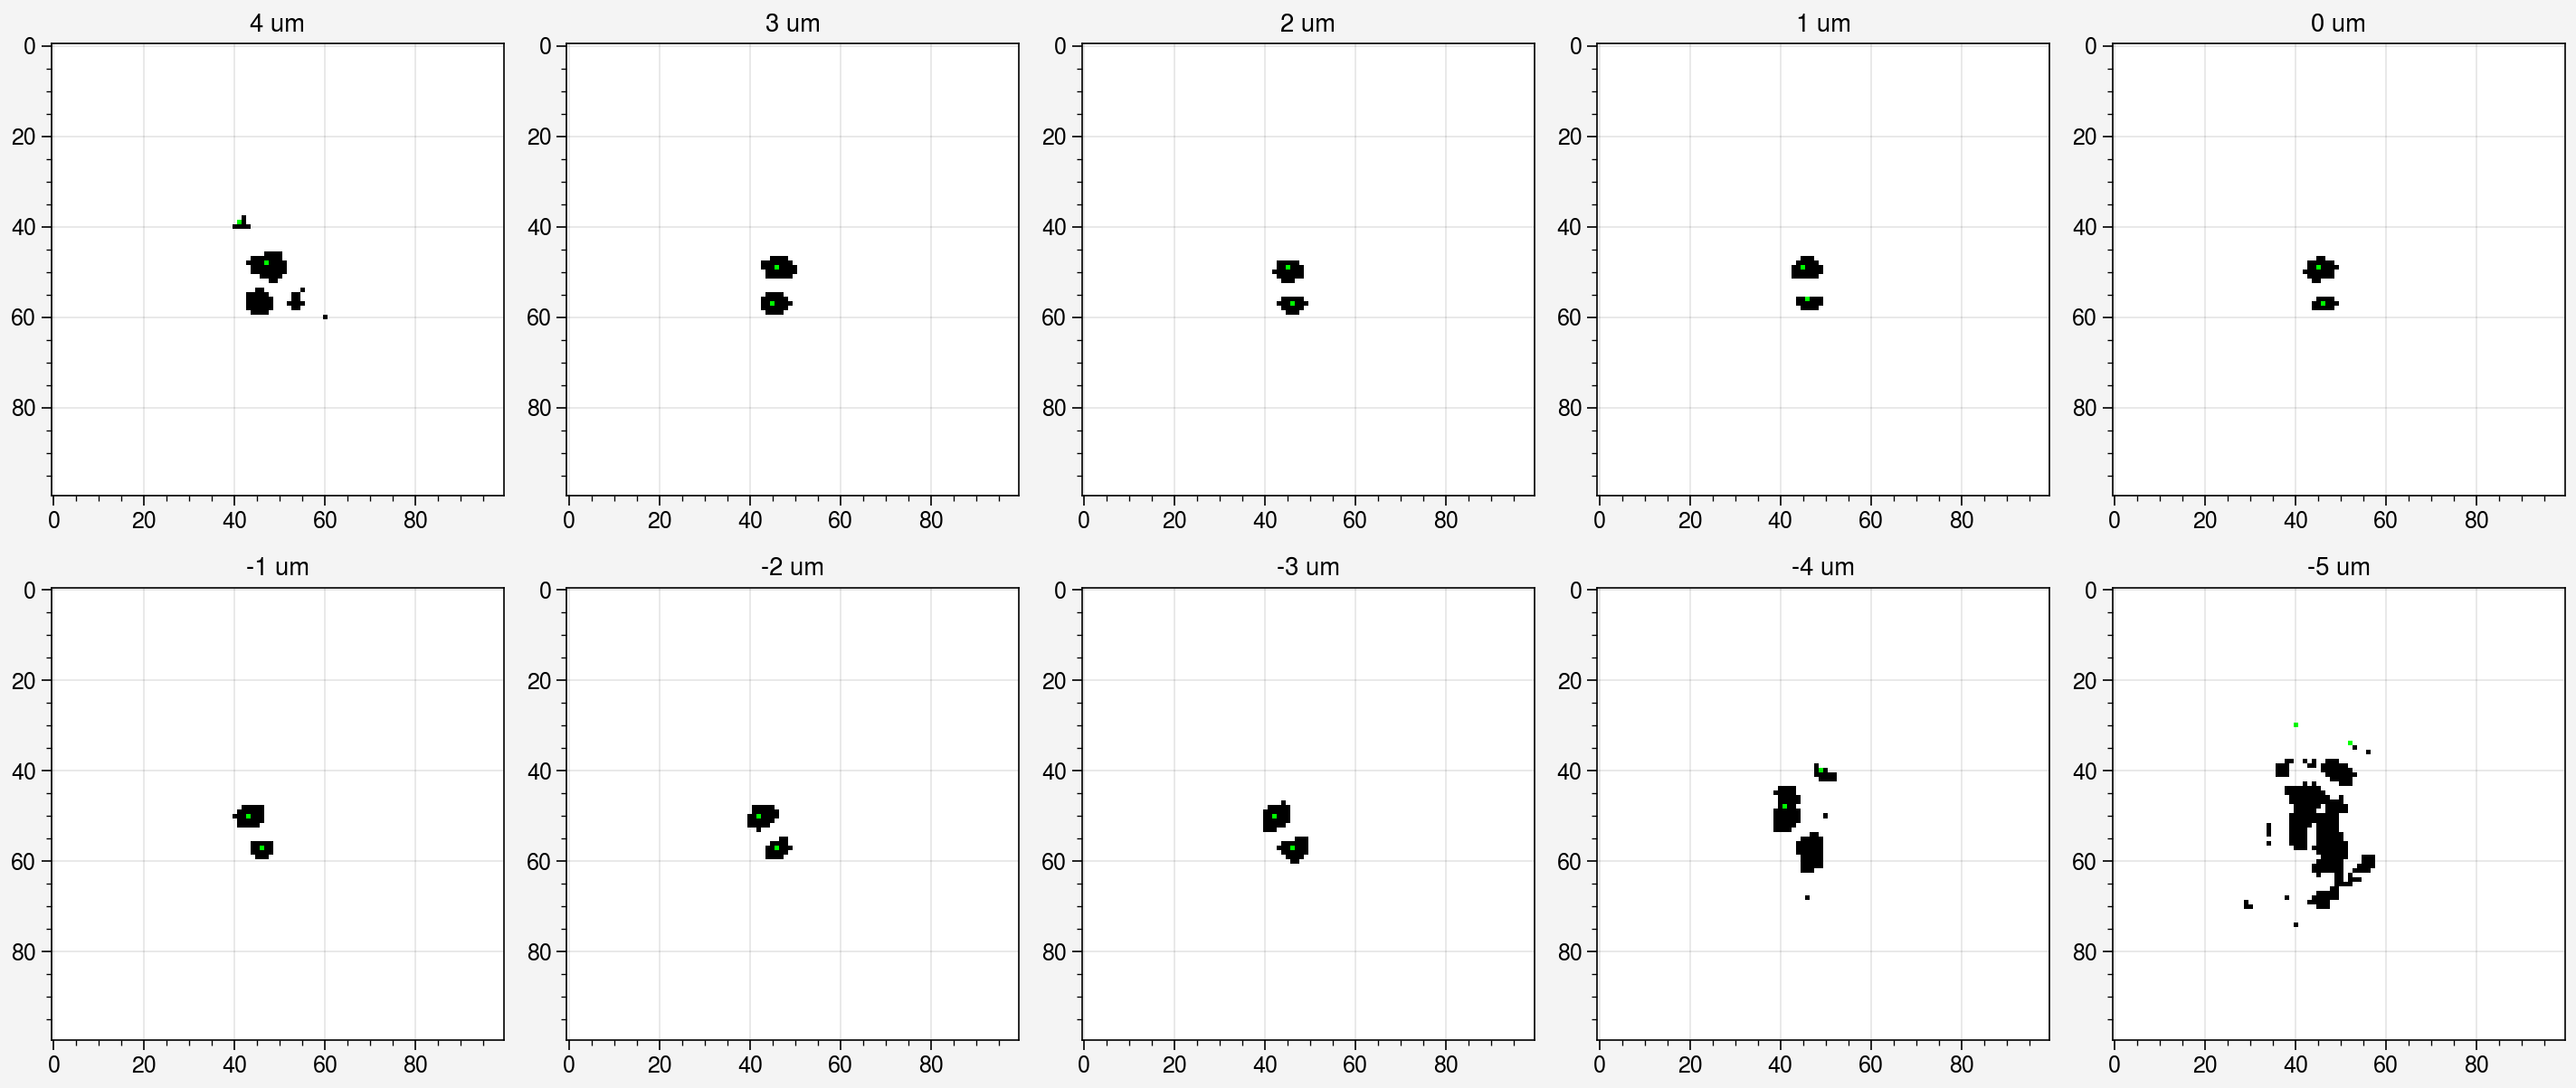

In [36]:
fig, axs = pplt.subplots(nrows = 2, ncols = 5, share=False)

angles = np.zeros(10)

for i in range(-5, 5):
# i = -2
    filename = "test_imgs/" + str(i) + ".tiff"
    image = PSFrot.readImage(path = filename)
    image = PSFrot.threshold(image, intensity=0.4)
    imC = gray2rgb(image)
    fill_psf = np.abs(1-image)
    label_objects, _ = ndi.label(fill_psf)
    c1 = ndi.center_of_mass(label_objects*(label_objects==1))
    c2 = ndi.center_of_mass(label_objects*(label_objects==2))
    print(c1)
    print(c2)
    cx = [int(c1[1]), int(c2[1])]
    cy = [int(c1[0]), int(c2[0])]
    # cx, cy, rad = PSFrot.findCircles(image)
    # imC = gray2rgb(image)
    print(np.rad2deg(np.arctan2(c1[0] - c2[0], c1[1] - c2[1])))
    # imC[cx[0]] = (0, 1., 0)
    # imC[c2[0], c2[1]] = (0, 1., 0)
    for cx, cy in zip(cx, cy):
        imC[cy, cx] = (0, 1., 0)
    axs[i//5, 4-i%5].imshow(imC)
    axs[i//5, 4-i%5].format(title = str(i) + " um")

fig.save("vysl.png", dpi=333)